In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression

from scipy.stats import randint as sp_randint
from time import time

In [2]:
data = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
data.drop(data.columns[0], axis=1, inplace=True) # Drop Unnamed: columns

In [4]:
data.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Check if columns has null values

In [5]:
data.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

Remove every line that has null values within these columns

In [6]:
columns = ['price',
           'points',
           'variety',
           'taster_name',
           'country',
           'winery'
          ]

for col in columns:
    data = data[pd.notnull(data[col])]

In [7]:
data.isna().sum()

country                      0
description                  0
designation              26501
points                       0
price                        0
province                     0
region_1                 19153
region_2                 61861
taster_name                  0
taster_twitter_handle     4920
title                        0
variety                      0
winery                       0
dtype: int64

### First classifier, predict taster name

As a first classifier, we are going to use only the points and the prices, which are numeric data, to predict who is the Taster.

In [8]:
X = data[['points', 'price']]
X.head()

,points,price
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0
5,87,15.0


In [9]:
y = data['taster_name']
y.head()

1            Roger Voss
2          Paul Gregutt
3    Alexander Peartree
4          Paul Gregutt
5     Michael Schachner
Name: taster_name, dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (72315, 2)
Training Labels Shape: (72315,)
Testing Features Shape: (24105, 2)
Testing Labels Shape: (24105,)


Here we create our RandomForestClassifier

In [13]:
clf = LogisticRegression()

In [14]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
y_pred = clf.predict(X_test)
y_pred

array(['Roger Voss', 'Roger Voss', 'Roger Voss', ..., 'Michael Schachner',
       'Michael Schachner', 'Roger Voss'], dtype=object)

In [16]:
accuracy_score(y_test, y_pred)

0.22410288321924912

In [18]:
clf.coef_.tolist()

[[-0.12948264661758097, -9.330671449533317e-06],
 [-0.032309316992122666, -0.005273671156014226],
 [0.23610275915043186, -0.02104002666132836],
 [-0.09193515391592863, -0.0009628823236938889],
 [-0.11412712935154046, 0.0008790733150466673],
 [-0.09453275263998767, -0.001976158349010181],
 [-0.028913044738829236, -0.030233279735984556],
 [0.053791586065079604, -0.01905613109830175],
 [-0.03309525205820306, 0.0006845480225491099],
 [-0.008740575784194267, 0.0033095492229375193],
 [-0.03968440776205158, -0.01886689744551166],
 [0.15804909958990992, -0.002980088074392498],
 [-0.2007920030853527, -0.006432812057955482],
 [-0.009800005592110562, -0.012097555075864583],
 [0.07227676143478608, -0.004638359082732392],
 [-0.016168762811129875, 0.002821121229498384],
 [-0.012865473571177519, -0.0001814934183222087],
 [-0.1059547707030177, -0.019882955658970497],
 [0.04010674215333042, 0.0040515733277945295]]

### Second classifier, predict taster name with more columns

For the second classifier, we are going to use categorical data, the country and the variety of wine.

In [19]:
X = data[['points', 'price', 'country', 'variety']]
X.head()

,points,price,country,variety
1,87,15.0,Portugal,Portuguese Red
2,87,14.0,US,Pinot Gris
3,87,13.0,US,Riesling
4,87,65.0,US,Pinot Noir
5,87,15.0,Spain,Tempranillo-Merlot


We cannot make use of the categorical data as is within our model, we need it to be in a OneHot format. Pandas provide a function called get_dummies that does just that.

In [20]:
X = pd.get_dummies(data=X, columns=['variety', 'country'])

In [21]:
y = data.taster_name

In [22]:
X.shape, y.shape

((96420, 697), (96420,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7146650072599046

### Using GridSearch to find the best hyperparameters

Here we'd like to find the best hyperparameters of our RandomForestClassifier using GridSearchCV. Specify here which parameter you want to Cross Validate and try to get a better model.

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=10,
                                                  n_jobs=5,
                                                  oob_score=False)

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
param_dist = {"n_estimators": range(2, 50, 2),
              "n_jobs": range(1, 20, 3)}

In [ ]:
random_forest_classifier = RandomForestClassifier(bootstrap= True, 
                                                  criterion='gini', 
                                                  max_depth=None, 
                                                  max_features= 31, 
                                                  min_samples_split=24)

In [ ]:
n_iter_search = 20
random_search = RandomizedSearchCV(random_forest_classifier,
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   cv=5)

In [ ]:
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

In [ ]:
report(random_search.cv_results_)

### Third classifier, predict price with points

In [25]:
X = data[['points']]
X.head()

,points
1,87
2,87
3,87
4,87
5,87


In [26]:
y = data[['price']]
y.head()

,price
1,15.0
2,14.0
3,13.0
4,65.0
5,15.0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (72315, 1)
Training Labels Shape: (72315, 1)
Testing Features Shape: (24105, 1)
Testing Labels Shape: (24105, 1)


In [28]:
linear_regression = LinearRegression()

In [29]:
X_test.points

109284    91
107439    88
31171     90
108103    86
124719    90
13660     86
17250     85
1833      84
49597     88
59078     88
32149     86
349       97
87350     91
108295    84
80250     83
128248    87
80605     92
104035    92
67397     90
94385     90
106311    88
62614     83
36874     87
86952     90
26261     88
36327     87
44833     85
102662    84
42906     81
46327     88
          ..
36113     89
73359     86
105412    90
32360     89
21607     91
24861     87
105203    82
45261     89
45932     90
114803    88
66558     84
93571     90
76888     92
80802     86
107661    90
105908    86
99059     92
25285     86
90552     88
528       91
85548     92
9800      93
74041     93
99477     89
55343     87
28015     86
58087     89
99934     84
92368     84
29327     92
Name: points, Length: 24105, dtype: int64

In [30]:
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
linear_regression.score(X_test, y_test)

0.1518389746238582

In [32]:
linear_regression.predict(X_test)

array([[49.24832639],
       [31.61124073],
       [43.36929784],
       ...,
       [ 8.09512651],
       [ 8.09512651],
       [55.12735495]])

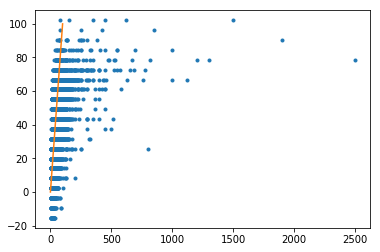

In [33]:
# plot prediction and actual data
y_pred = linear_regression.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 100, 50)
y = x
plt.plot(x, y)
plt.show()